In [1]:
import numpy as np

In [2]:
from sklearn.datasets.samples_generator import make_circles
from sklearn.datasets import fetch_covtype
x1, y1 = make_circles(500, factor=.1, noise=.1)
x2_help, y2_help = fetch_covtype(return_X_y=True)
x2 = x2_help[:1000]
y2 = y2_help[:1000]

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


# Представити початкові дані графічно

In [3]:
%matplotlib inline
from pandas import DataFrame
import matplotlib.pyplot as plt

In [4]:
def visualize_data(X, y_true):
    plt.scatter(X[:,0], X[:,1], c=y_true, alpha=0.5)

## make_circles

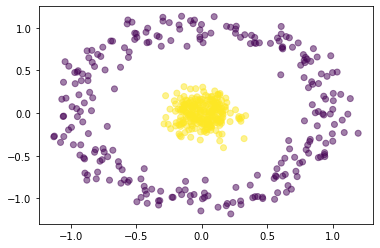

In [5]:
visualize_data(x1, y1)

## fetch_covtype

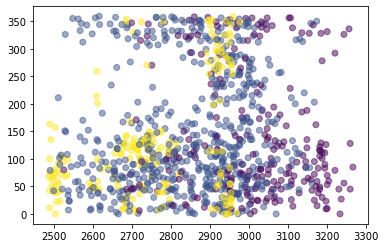

In [6]:
visualize_data(x2, y2)

# Побудувати модель кластеризації, виконати кластеризацію даних на основі моделі, представити розбиття на кластери графічно, розрахувати додаткові результати кластеризації та побудувати декілька альтернативних моделей.

Метрики якості кластеризації, які необхідно розрахувати:

Adjusted Rand Index - враховуючи labels_true та labels_pred, отримані в результаті роботи алгоритму, Adjusted Rand Index - це функція, яка вимірює подібність двох присвоєнь, ігноруючи перестановки та з можливістю нормалізації. Ідеальна кластеризація оцінюється як 1, для поганої кластеризації може бути від'ємний або близький до нуля результат.

Adjusted Mutual Information - це функція, яка вимірює узгодження двох присвоєнь, ігноруючи перестановки. Ідеальна кластеризація оцінюється як 1, для поганої кластеризації буде від'ємний результат.

Silhouette Coefficient - оцінка, коли вищий бал відноситься до моделі з більш чітко визначеними кластерами. Оцінка лежить в проміжку між -1 для неправильної кластеризації та +1 для дуже щільної кластеризації. Оцінки, близькі до нуля, вказують на перекривання кластерів.

In [7]:
from sklearn.cluster import OPTICS, cluster_optics_dbscan
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score, silhouette_score

In [8]:
def visualizationClusters(X, y_pred):
    plt.figure()
    plt.scatter(X[:, 0], X[:, 1], c=y_pred, alpha=0.5)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()

    
def testOPTICSModel(X, y_true, min_samples, min_cluster_size, p=2):
    print("min_samples =", min_samples)
    print("min_cluster_size =", min_cluster_size)
    print("p =", p)
    model = OPTICS(min_samples=min_samples, min_cluster_size=min_cluster_size, p=p)
    y_pred = model.fit_predict(X)
    visualizationClusters(X, y_pred)
    print("Adjusted Rand Index: ", adjusted_rand_score(y_true, y_pred))
    print("Adjusted Mutual Info: ", adjusted_mutual_info_score(y_true, y_pred))
    print("Silhouette Coefficient: ", silhouette_score(X, y_pred))
    print("Amount of clusters: ", len(set(model.labels_)))
    print("\n")

## OPTICS

Алгоритм OPTICS має багато спільного з алгоритмом DBSCAN, і його можна вважати узагальненням DBSCAN, який послаблює вимогу, що накладається на eps - від одного значення до діапазону значень.

Виконаємо кластеризацію першого і другого набору даних із використанням першої моделі. Будемо змінювати параметри алгоритму OPTICS: min_samples, min_cluster_size, p та виводити помилки моделі на обох наборах даних та графіки отриманих кластерів.
min_samples - мінімальна кількість точок в околі точки, яку слід розглядати як основну точку.
min_cluster_size - мінімальна кількість точок у кластері
p - параметр для метрики Мінковського від sklearn.metrics.pairwise_distances. Коли p = 1, це еквівалентно використанню manhattan_distance(l1) та euclidean_distance(l2) для p = 2. Для довільного p використовується minkowski_distance(l_p).

## make_circles

min_samples = 2
min_cluster_size = 10
p = 2


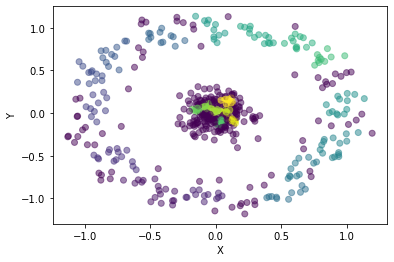

Adjusted Rand Index:  0.10423558368868263
Adjusted Mutual Info:  0.25978701906484214
Silhouette Coefficient:  -0.07962508766339768
Amount of clusters:  23


min_samples = 10
min_cluster_size = 20
p = 2


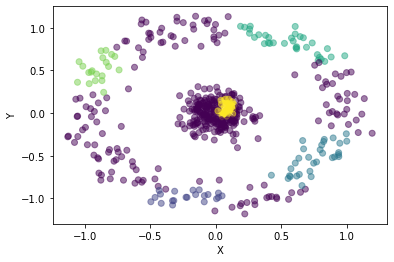

Adjusted Rand Index:  0.06685648795113107
Adjusted Mutual Info:  0.24055261128052893
Silhouette Coefficient:  -0.16873290810266922
Amount of clusters:  6


min_samples = 20
min_cluster_size = 30
p = 2


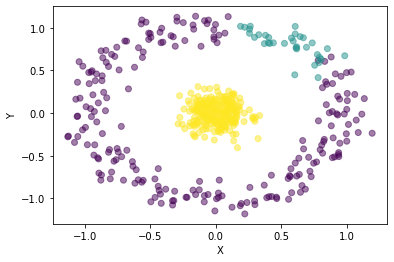

Adjusted Rand Index:  0.8822322606818457
Adjusted Mutual Info:  0.8742515717390985
Silhouette Coefficient:  0.3186348924005363
Amount of clusters:  3


min_samples = 15
min_cluster_size = 30
p = 1


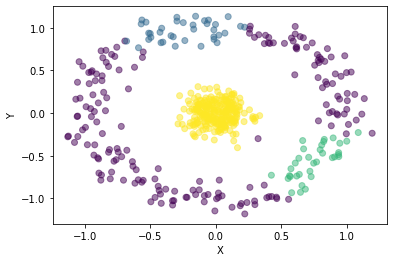

Adjusted Rand Index:  0.769113382957641
Adjusted Mutual Info:  0.7625556055333673
Silhouette Coefficient:  0.3522033342124224
Amount of clusters:  4


min_samples = 2
min_cluster_size = 10
p = 1


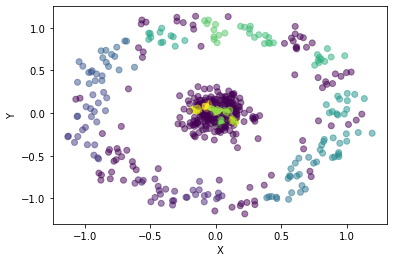

Adjusted Rand Index:  0.11056887438274879
Adjusted Mutual Info:  0.25686396418537166
Silhouette Coefficient:  -0.1431403038660993
Amount of clusters:  20




In [9]:
testOPTICSModel(x1, y1, 2, 10)
testOPTICSModel(x1, y1, 10, 20)
testOPTICSModel(x1, y1, 20, 30)
testOPTICSModel(x1, y1, 15, 30, 1)
testOPTICSModel(x1, y1, 2, 10, 1)

Для цього датасету найбільше підійшов третій набір параметрів. Він кластеризував його майже повністю правильно, на що вказують перші дві метрики, значення яких доволі близькі до 1.

## fetch_covtype

min_samples = 2
min_cluster_size = 10
p = 2


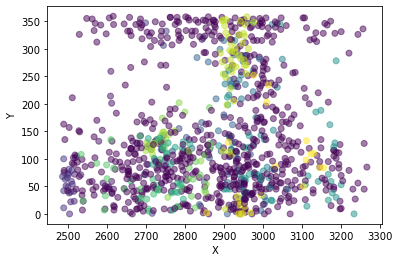

Adjusted Rand Index:  0.16072832305321041
Adjusted Mutual Info:  0.20848484232803385
Silhouette Coefficient:  -0.34411118994798534
Amount of clusters:  23


min_samples = 10
min_cluster_size = 20
p = 2


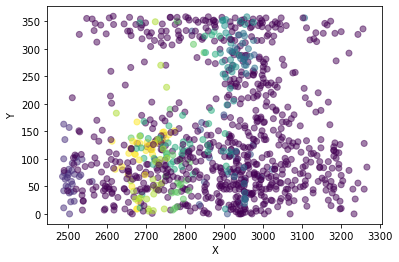

Adjusted Rand Index:  0.2562778842805843
Adjusted Mutual Info:  0.24294209709809
Silhouette Coefficient:  -0.3328538697060025
Amount of clusters:  9


min_samples = 10
min_cluster_size = 30
p = 2


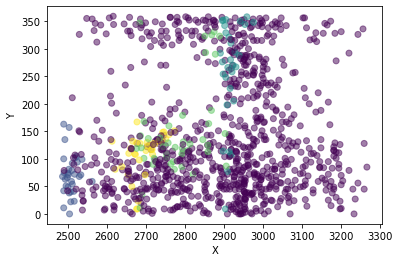

Adjusted Rand Index:  0.20148919409403945
Adjusted Mutual Info:  0.2080500140807382
Silhouette Coefficient:  -0.2618366038230235
Amount of clusters:  5


min_samples = 15
min_cluster_size = 30
p = 1


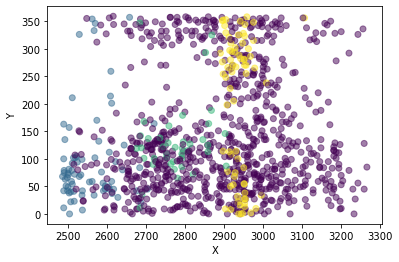

Adjusted Rand Index:  0.2006252651764386
Adjusted Mutual Info:  0.19029754764391535
Silhouette Coefficient:  -0.17173349232978485
Amount of clusters:  4


min_samples = 2
min_cluster_size = 10
p = 1


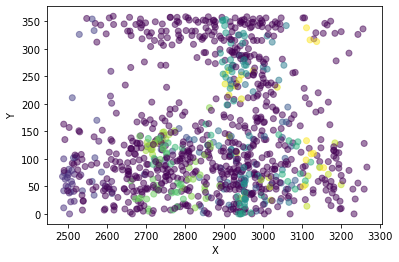

Adjusted Rand Index:  0.18036863679692974
Adjusted Mutual Info:  0.20307044429359156
Silhouette Coefficient:  -0.3895540793460202
Amount of clusters:  23




In [10]:
testOPTICSModel(x2, y2, 2, 10)
testOPTICSModel(x2, y2, 10, 20)
testOPTICSModel(x2, y2, 10, 30)
testOPTICSModel(x2, y2, 15, 30, 1)
testOPTICSModel(x2, y2, 2, 10, 1)

Для цього датасету найбільш точним був другий набір параметрів. Але, насправді, для усіх наборів параметрів метрики доволі погані - вони близькі до нуля.

## DBSCAN

Алгоритм DBSCAN розглядає кластери як області високої щільності, розділені зонами низької щільності. Завдяки цьому досить загальному погляду кластери, знайдені DBSCAN, можуть мати будь-яку форму. У алгоритмі є два параметри, min_samples та eps, які формально визначають, що ми маємо на увазі, коли ми говоримо "щільно". Вищі значення min_samples або нижчі eps вказують на більшу щільність, необхідну для формування кластера.

Будемо працювати з другою моделлю. Візьмемо найкращі моделі алгоритму OPTICS для кожного з наборів та на їх основі створюватимемо нову модель, змінюючи параметр eps

In [11]:
def testDBSCANModel(X, y_true, eps, min_samples, min_cluster_size, p=2):
    print("eps =", eps)
    helpModel = OPTICS(min_samples=min_samples, min_cluster_size=min_cluster_size, p=p)
    helpModel.fit(X)
    y_pred = cluster_optics_dbscan(reachability=helpModel.reachability_,
                                   core_distances=helpModel.core_distances_,
                                   ordering=helpModel.ordering_,
                                   eps=eps)
    visualizationClusters(X, y_pred)
    print("Adjusted Rand Index: ", adjusted_rand_score(y_true, y_pred))
    print("Adjusted Mutual Info: ", adjusted_mutual_info_score(y_true, y_pred))
    if len(set(y_pred)) > 1:
        print("Silhouette Coefficient: ", silhouette_score(X, y_pred))
    print("Amount of clusters: ", len(set(y_pred)))
    print("\n")

## make_circles

eps = 0.1


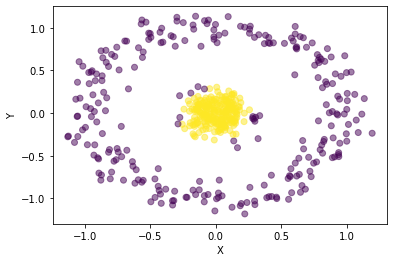

Adjusted Rand Index:  0.8833671081895793
Adjusted Mutual Info:  0.8345238933932456
Silhouette Coefficient:  0.2436981412107571
Amount of clusters:  2


eps = 0.5


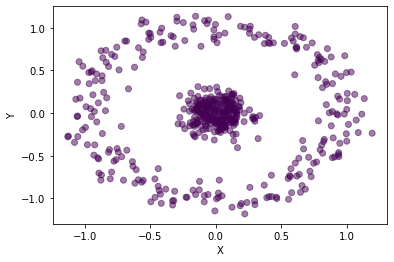

Adjusted Rand Index:  0.0
Adjusted Mutual Info:  0.0
Amount of clusters:  1


eps = 1


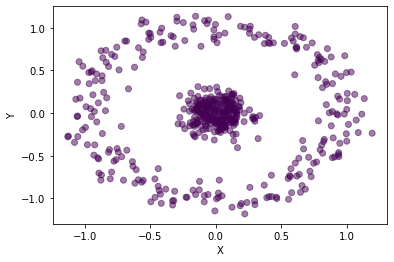

Adjusted Rand Index:  0.0
Adjusted Mutual Info:  0.0
Amount of clusters:  1




In [12]:
testDBSCANModel(x1, y1, 0.1, 20, 30)
testDBSCANModel(x1, y1, 0.5, 20, 30)
testDBSCANModel(x1, y1, 1, 20, 30)

Бачимо, що при eps=0.1 ми майже повністю відновили початкові кластери. Збільшення параметра погіршує ситуацію, при eps=1 алгоритм вважає дані одним кластером.

## fetch_covtype

eps = 0.1


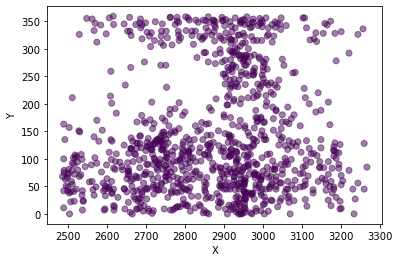

Adjusted Rand Index:  0.0
Adjusted Mutual Info:  3.190377893877689e-15
Amount of clusters:  1


eps = 0.5


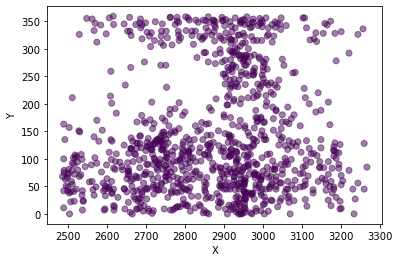

Adjusted Rand Index:  0.0
Adjusted Mutual Info:  3.190377893877689e-15
Amount of clusters:  1


eps = 1


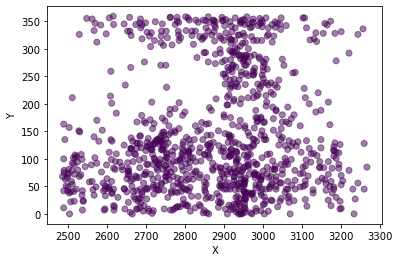

Adjusted Rand Index:  0.0
Adjusted Mutual Info:  3.190377893877689e-15
Amount of clusters:  1




In [13]:
testDBSCANModel(x2, y2, 0.1, 10, 30)
testDBSCANModel(x2, y2, 0.5, 10, 30)
testDBSCANModel(x2, y2, 1, 10, 30)

Бачимо, що якість моделі ніяк не покращилася і алгоритм вважає усі дані одним кластером.

# Нормалізація та стандартизація даних

In [14]:
from sklearn.preprocessing import Normalizer, StandardScaler

Спробуємо нормалізувати та стандартизувати дані другого набору та виконати кластеризацію за допомогою алгоритму OPTICS

min_samples = 2
min_cluster_size = 10
p = 2


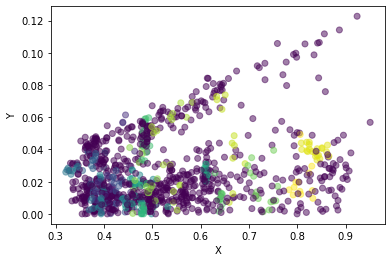

Adjusted Rand Index:  0.12887593009062914
Adjusted Mutual Info:  0.16471275738198715
Silhouette Coefficient:  -0.373074646710793
Amount of clusters:  24


min_samples = 15
min_cluster_size = 30
p = 2


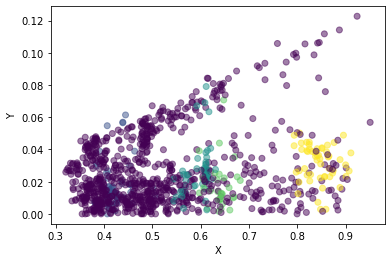

Adjusted Rand Index:  0.13643514765996925
Adjusted Mutual Info:  0.11450858383534265
Silhouette Coefficient:  -0.12729099368290678
Amount of clusters:  5




In [15]:
normalizer=Normalizer(norm='l2').fit(x2)
new_data=normalizer.transform(x2)
testOPTICSModel(new_data, y2, 2, 10)
testOPTICSModel(new_data, y2, 15, 30)

min_samples = 2
min_cluster_size = 10
p = 2


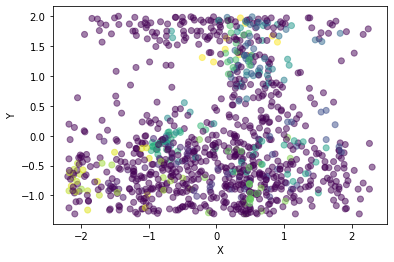

Adjusted Rand Index:  0.07872683203022635
Adjusted Mutual Info:  0.1247218112106101
Silhouette Coefficient:  -0.25986441543909755
Amount of clusters:  22


min_samples = 15
min_cluster_size = 30
p = 2


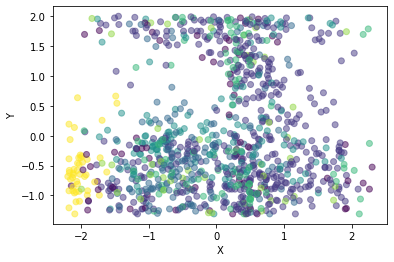

Adjusted Rand Index:  0.04331172937988857
Adjusted Mutual Info:  0.09176176156873325
Silhouette Coefficient:  0.25993369662206717
Amount of clusters:  7




In [16]:
scaler=StandardScaler().fit(x2)
new_data=scaler.transform(x2)
testOPTICSModel(new_data,y2, 2, 10)
testOPTICSModel(new_data,y2, 15, 30)

Бачимо, що стандартизація та нормалізація зовсім трохи покращують результати, проте усе одно результат є доволі випадковим згідно з метриками, які є близькими до нуля.

# Стабільність моделей після зміни порядку об’єктів вхідних даних

In [17]:
def testStability(x, y):
    helpArray = np.hstack((x, y.reshape(-1, 1)))
    print("Original dataset")
    testOPTICSModel(x, y, 20, 30)
    np.random.shuffle(helpArray)
    x = helpArray[:, 0:2]
    y = helpArray[:, 2]
    print("New dataset")
    testOPTICSModel(x, y, 20, 30)

Original dataset
min_samples = 20
min_cluster_size = 30
p = 2


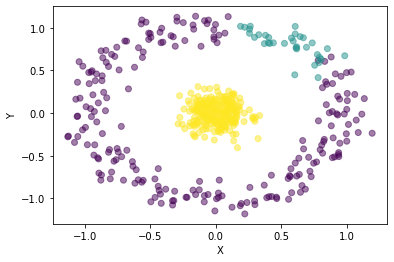

Adjusted Rand Index:  0.8822322606818457
Adjusted Mutual Info:  0.8742515717390985
Silhouette Coefficient:  0.3186348924005363
Amount of clusters:  3


New dataset
min_samples = 20
min_cluster_size = 30
p = 2


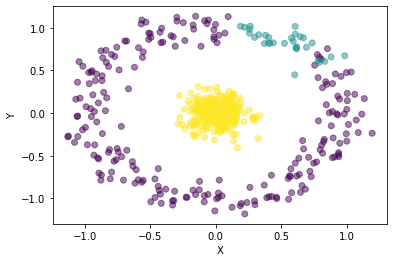

Adjusted Rand Index:  0.891134133642837
Adjusted Mutual Info:  0.8806051207955018
Silhouette Coefficient:  0.3103159449632231
Amount of clusters:  3




In [18]:
testStability(x1, y1)

Бачимо, що на графіку лише декілька точок змінили свій клас, але всі інші залишилися у своєму попередньому кластері(слід дивитися саме на групи точок і на те, чи замальовані вони одним кольором в рамках одного малюнку, а не на відповідність кольорів першого і другого малюнків адже кожного разу програма по різному замальовує один і той самий кластер через особливості реалізації побудови графіка)

Original dataset
min_samples = 20
min_cluster_size = 30
p = 2


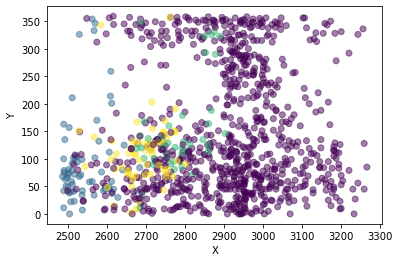

Adjusted Rand Index:  0.1036366995131137
Adjusted Mutual Info:  0.11399131486215444
Silhouette Coefficient:  -0.07545888577634462
Amount of clusters:  4


New dataset
min_samples = 20
min_cluster_size = 30
p = 2


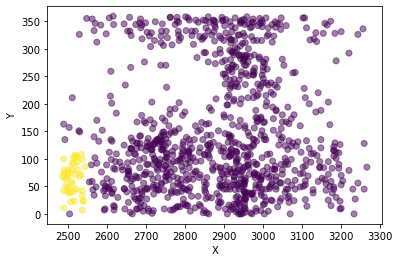

Adjusted Rand Index:  -0.0018159951264548721
Adjusted Mutual Info:  0.00704966779538588
Silhouette Coefficient:  0.3240213395474774
Amount of clusters:  2




In [19]:
testStability(x2, y2)

Із цим датасетом ситуація гірше, що можна побачити на графіку - багато точок змінили свій клас. Це пов'язане з тим, що кластеризація є в цілом досить випадковою.

# Висновки

Бачимо, що при гарному підборі параметрів алгоритму OPTICS, а саме збільшенні параметрів min_samples, min_cluster_size, а також при малому eps у алгроитмі DBSCAN ми можемо отримати максимально правдиву кластеризацію першого набору аж до найкращого значення зовнішніх метрик. Також було перевірено, що на першому наборі алгоритм OPTICS є стабільним, перестановка вхідних даних дуже мало змінює результат роботи алгоритму, що можна бачити по графіку та значенням метрик. Стосовно другого набору даних, то на обох алгоритмах кластеризація є більш випадковою з близьким до нуля значенням зовнішніх метрик. Стандартизація та нормалізація дещо покращують результати, проте це дає незначне (до 0.1) збільшення метрик якості.